In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


## prep for violine plot,  sortted categorical type

In [5]:
fuel_econ['VClass'].value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [7]:
#type of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

In [8]:
# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

In [9]:
#Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

<AxesSubplot:xlabel='VClass', ylabel='comb'>

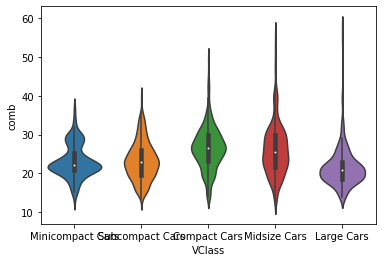

In [11]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb')

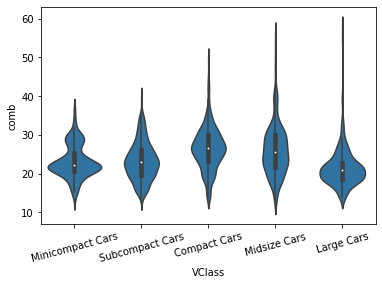

In [15]:
base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner=None)
plt.xticks(rotation=15);

<AxesSubplot:xlabel='comb', ylabel='VClass'>

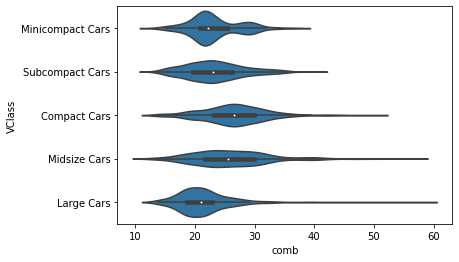

In [17]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, innner=None)

## boxplot

In [45]:
#plt.figure(figsize=[16,3])
#plt.figure(figsize=[16,3],dpi=200)

plt.rcParams["figure.figsize"] = (16,4)  # resize figure
base_color=sns.color_palette()[0]

(6.966470319355814, 63.09321945242605)

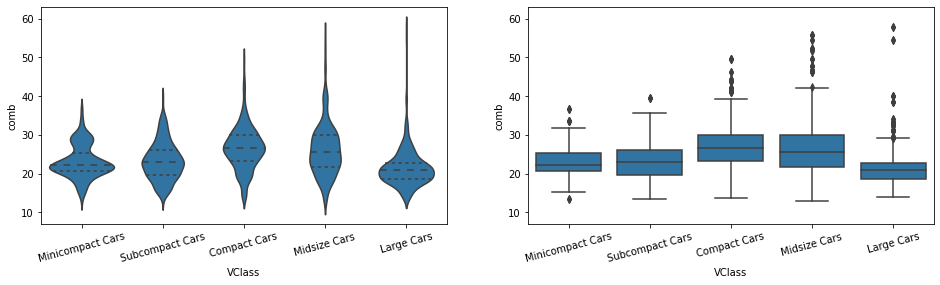

In [46]:
plt.subplot(1,2,1)
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')  #with quartile information
plt.xticks(rotation=15);

plt.subplot(1,2,2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())

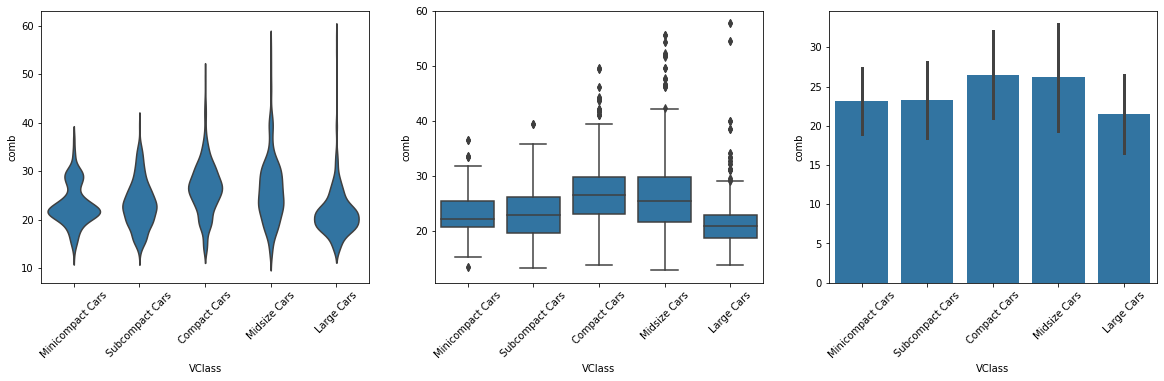

In [66]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color, errwidth=3, ci='sd')
plt.xticks(rotation = 45);

<AxesSubplot:xlabel='VClass', ylabel='comb'>

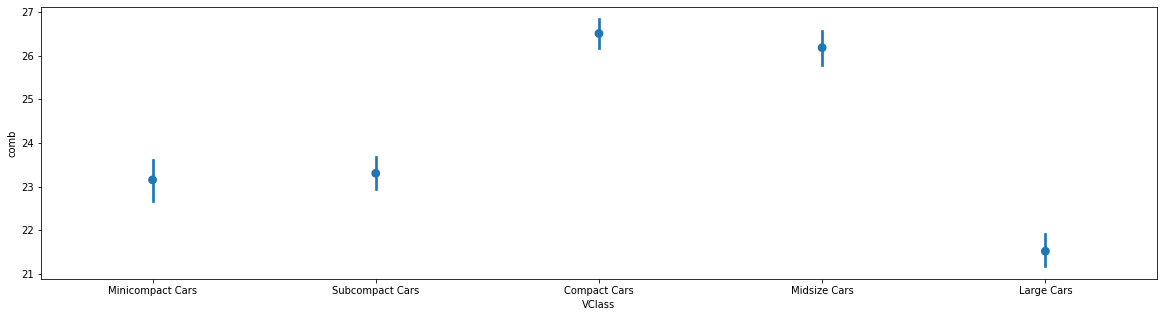

In [53]:
plt.figure(figsize = [20, 5])
sns.pointplot(data=fuel_econ, x='VClass', y='comb', linestyles=' ')